In [333]:
import ssl

import numpy as np

ssl._create_default_https_context = ssl._create_unverified_context

In [334]:
import pandas as pd

odf = pd.read_csv("https://npg-ds.s3.amazonaws.com/penguins.csv")
odf.copy()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [335]:
# copy the dataframe from later usage
df = odf.copy()

The dataset has the following features:

1. Species: penguin species
    - Chinstrap
    - Adelie (Adélie)
    - Gentoo
2. Culmen length: culmen length (mm)
3. Culmen depth: culmen depth (mm)
4. Flipper length: flipper length (mm)
5. Body mass: body mass (g)
6. Island: island name in the Palmer Archipelago (Antarctica)
    - Dream
    - Torgersen
    - Biscoe
7. Sex: penguin sex
    - MALE
    - FEMALE

Let's see some statistics on the data.

In [336]:
df.copy().describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


And check for missing values per feature.

In [337]:
df.copy().isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

We have a few values missing, As they are not too many of them we can just remove them.

In [338]:
df.dropna(subset=["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g", "sex"], inplace=True)
df.copy()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


We have some categorical features, `species`, `island`, and `sex`. We'll use Target Encoding, our target will be the `species` column.

In [339]:
from category_encoders import TargetEncoder

# transform into numeric value
target_ordinals = {
    "Adelie": 0,
    "Chinstrap": 1,
    "Gentoo": 2,
}
df["species"] = df["species"].apply(lambda x: target_ordinals[x])

# encode categorical data
ndf = TargetEncoder().fit_transform(df['island'], df["species"])
df["island"] = ndf

ndf = TargetEncoder().fit_transform(df['sex'], df["species"])
df["sex"] = ndf
df.copy()

/Users/npg/Library/Caches/pypoetry/virtualenvs/mlucu-Vdmf4rJI-py3.8/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,0.000000,39.1,18.7,181.0,3750.0,0.928571
1,0,0.000000,39.5,17.4,186.0,3800.0,0.909091
2,0,0.000000,40.3,18.0,195.0,3250.0,0.909091
4,0,0.000000,36.7,19.3,193.0,3450.0,0.909091
5,0,0.000000,39.3,20.6,190.0,3650.0,0.928571
...,...,...,...,...,...,...,...
338,2,1.463415,47.2,13.7,214.0,4925.0,0.909091
340,2,1.463415,46.8,14.3,215.0,4850.0,0.909091
341,2,1.463415,50.4,15.7,222.0,5750.0,0.928571
342,2,1.463415,45.2,14.8,212.0,5200.0,0.909091


We'll now have to normalize the values.

In [340]:
# normalize everything but the count
cols = df.columns.difference(['species'])
df[cols] = (df[cols] - df[cols].mean()) / df[cols].std()
df.describe()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,334.000000,3.340000e+02,3.340000e+02,3.340000e+02,3.340000e+02,3.340000e+02,3.340000e+02
mean,0.922156,-2.127373e-16,4.254747e-17,-4.680222e-16,8.934969e-16,-1.276424e-16,5.571724e-15
std,0.890349,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,0.000000,-1.643874e+00,-2.178237e+00,-2.063346e+00,-2.069220e+00,-1.874987e+00,-1.009878e+00
25%,0.000000,-6.583478e-01,-8.230553e-01,-7.929628e-01,-7.855393e-01,-8.188709e-01,-1.009878e+00
50%,1.000000,-6.583478e-01,9.260812e-02,7.089806e-02,-2.863300e-01,-1.976264e-01,9.898726e-01
75%,2.000000,9.648710e-01,8.388738e-01,7.823129e-01,8.547197e-01,7.264747e-01,9.898726e-01
max,2.000000,9.648710e-01,2.857912e+00,2.205143e+00,2.138401e+00,2.597974e+00,9.898726e-01


Let's check the correlation matrix.

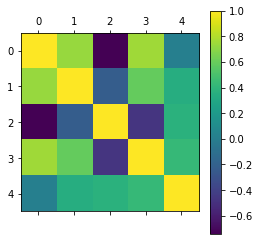

,species,culmen_length_mm,culmen_depth_mm,body_mass_g,sex
species,1.000000,0.729262,-0.740803,0.751020,0.012145
culmen_length_mm,0.729262,1.000000,-0.228640,0.589066,0.344109
culmen_depth_mm,-0.740803,-0.228640,1.000000,-0.472987,0.371562
body_mass_g,0.751020,0.589066,-0.472987,1.000000,0.425304
sex,0.012145,0.344109,0.371562,0.425304,1.000000


In [341]:
df = df.drop("island", axis=1)
df = df.drop("flipper_length_mm", axis=1)


import matplotlib.pyplot as plt

# plot heatmap
plt.matshow(df.corr())
cb = plt.colorbar()
plt.show()

# show numerical values
df.corr()

In [342]:
from pandas import DataFrame
# from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans

# split into features and labels
features = df.copy()
features = features.drop("species", axis=1)
labels = df["species"]

k_means = KMeans(n_clusters=3, init="k-means++", n_init=100, max_iter=1000).fit(features)

# scores = cross_val_score(k_means, features, labels, cv=10)
result_df = DataFrame()
result_df["prediction"] = k_means.predict(features)
result_df["expected"] = labels
result_df

,prediction,expected
0,2,0.0
1,1,0.0
2,1,0.0
3,1,NaN
4,2,0.0
...,...,...
329,0,2.0
330,0,2.0
331,0,2.0
332,0,2.0
